<a href="https://colab.research.google.com/github/7aslan/TensorFlow_Practice/blob/main/03_Convolutional_Neural_Networks_and_Computer_Vision_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks with Tensorflow

In this Project, We are going to use CNN and using CNN , we will complete our project
For example, you might want to:

    Classify whether a picture of food contains pizza 🍕 or steak 🥩 (we're going to do this)
    Detect whether or not an object appears in an image (e.g. did a specific car pass through a security camera?)

In this notebook, we're going to follow the TensorFlow modelling workflow we've been following so far whilst learning about how to build and use CNNs




In this notebook, we're going to follow the TensorFlow modelling workflow we've been following so far whilst learning about how to build and use CNNs.
What we're going to cover

Specifically, we're going to go through the follow with TensorFlow:

    Getting a dataset to work with
    Architecture of a convolutional neural network
    A quick end-to-end example (what we're working towards)
    Steps in modelling for binary image classification with CNNs
        Becoming one with the data
        Preparing data for modelling
        Creating a CNN model (starting with a baseline)
        Fitting a model (getting it to find patterns in our data)
        Evaluating a model
        Improving a model
        Making a prediction with a trained model
    Steps in modelling for multi-class image classification with CNNs
    Same as above (but this time with a different dataset)



Get the data

Because convolutional neural networks work so well with images, to learn more about them, we're going to start with a dataset of images.

The images we're going to work with are from the Food-101 dataset, a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

    🔑 Note: To prepare the data we're using, preprocessing steps such as, moving the images into different subset folders, have been done. To see these preprocessing steps check out the preprocessing notebook.

We'll download the pizza_steak subset .zip file and unzip it.


In [ ]:
import zipfile
# Download the zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip","r")
zip_ref.extractall()
zip_ref.close()

--2023-06-16 15:11:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.250.4.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  18.5MB/s    in 6.9s    

2023-06-16 15:11:17 (15.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak


test  train


In [ ]:
!ls pizza_steak/train


pizza  steak


In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

There are lots of steak images . But How many ?

In [ ]:
import os
# Walk through pizza/steak directory and list number of files


for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
# Another way to find out How many image are in a file :
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [ ]:
# Lets learn that how many image are in pizza_steak/train/pizza folder:

num_pizza_images_train = len(os.listdir("pizza_steak/train/pizza"))
num_pizza_images_train

750

In [ ]:
# Get the class names (Programatically , this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/")# Turn our training path into a python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))# Created a list of class_name from the subdirectories
print(class_names)

['pizza' 'steak']


🤔 Note: Whenever you're working with data, it's always good to visualize it as much as possible. Treat your first couple of steps of a project as becoming one with the data. Visualize, visualize, visualize.

In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir , target_class):
  # Set up target directory (We will view images from here )
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img= mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape :{img.shape}") # Show the shape of image

  return img

Image shape :(512, 512, 3)


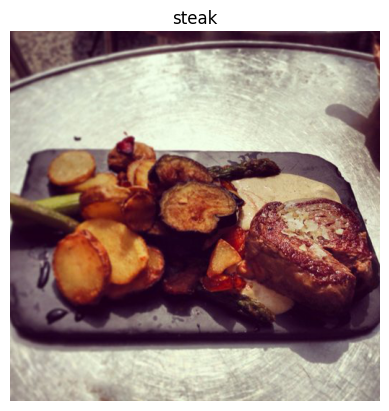

In [ ]:
# View the random image from the training dataset
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "steak")



After going through a dozen or so images from the different classes, you can start to get an idea of what we're working with.

The entire Food101 dataset comprises of similar images from 101 different classes.

You might've noticed we've been printing the image shape alongside the plotted image.

This is because the way our computer sees the image is in the form of a big array (tensor).


In [ ]:
img

array([[[ 81,  47,  61],
        [ 83,  49,  63],
        [ 86,  53,  64],
        ...,
        [ 40,   2,  27],
        [ 41,   3,  28],
        [ 42,   4,  29]],

       [[ 74,  40,  54],
        [ 78,  44,  58],
        [ 83,  50,  61],
        ...,
        [ 41,   3,  28],
        [ 40,   2,  27],
        [ 39,   1,  26]],

       [[ 69,  35,  51],
        [ 73,  39,  53],
        [ 80,  47,  58],
        ...,
        [ 43,   5,  30],
        [ 40,   2,  27],
        [ 37,   0,  24]],

       ...,

       [[151, 140, 136],
        [150, 139, 135],
        [150, 139, 135],
        ...,
        [150, 143, 135],
        [153, 146, 138],
        [156, 149, 141]],

       [[150, 139, 137],
        [149, 138, 136],
        [149, 138, 134],
        ...,
        [156, 149, 141],
        [154, 147, 139],
        [147, 140, 132]],

       [[150, 139, 137],
        [148, 137, 135],
        [148, 137, 135],
        ...,
        [161, 154, 146],
        [157, 150, 142],
        [145, 138, 128]]

In [ ]:
img.shape

(512, 512, 3)

Looking at the image shape more closely, you'll see it's in the form (Width, Height, Colour Channels).

In our case, the width and height vary but because we're dealing with colour images, the colour channels value is always 3. This is for different values of red, green and blue (RGB) pixels.

You'll notice all of the values in the img array are between 0 and 255. This is because that's the possible range for red, green and blue values.

For example, a pixel with a value red=0, green=0, blue=255 will look very blue.

So when we build a model to differentiate between our images of pizza and steak, it will be finding patterns in these different pixel values which determine what each class looks like.

🔑 Note: As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255.

In [ ]:
img/255

array([[[0.31764706, 0.18431373, 0.23921569],
        [0.3254902 , 0.19215686, 0.24705882],
        [0.3372549 , 0.20784314, 0.25098039],
        ...,
        [0.15686275, 0.00784314, 0.10588235],
        [0.16078431, 0.01176471, 0.10980392],
        [0.16470588, 0.01568627, 0.11372549]],

       [[0.29019608, 0.15686275, 0.21176471],
        [0.30588235, 0.17254902, 0.22745098],
        [0.3254902 , 0.19607843, 0.23921569],
        ...,
        [0.16078431, 0.01176471, 0.10980392],
        [0.15686275, 0.00784314, 0.10588235],
        [0.15294118, 0.00392157, 0.10196078]],

       [[0.27058824, 0.1372549 , 0.2       ],
        [0.28627451, 0.15294118, 0.20784314],
        [0.31372549, 0.18431373, 0.22745098],
        ...,
        [0.16862745, 0.01960784, 0.11764706],
        [0.15686275, 0.00784314, 0.10588235],
        [0.14509804, 0.        , 0.09411765]],

       ...,

       [[0.59215686, 0.54901961, 0.53333333],
        [0.58823529, 0.54509804, 0.52941176],
        [0.58823529, 0

## A (typical) architecture of a convolutional neural network


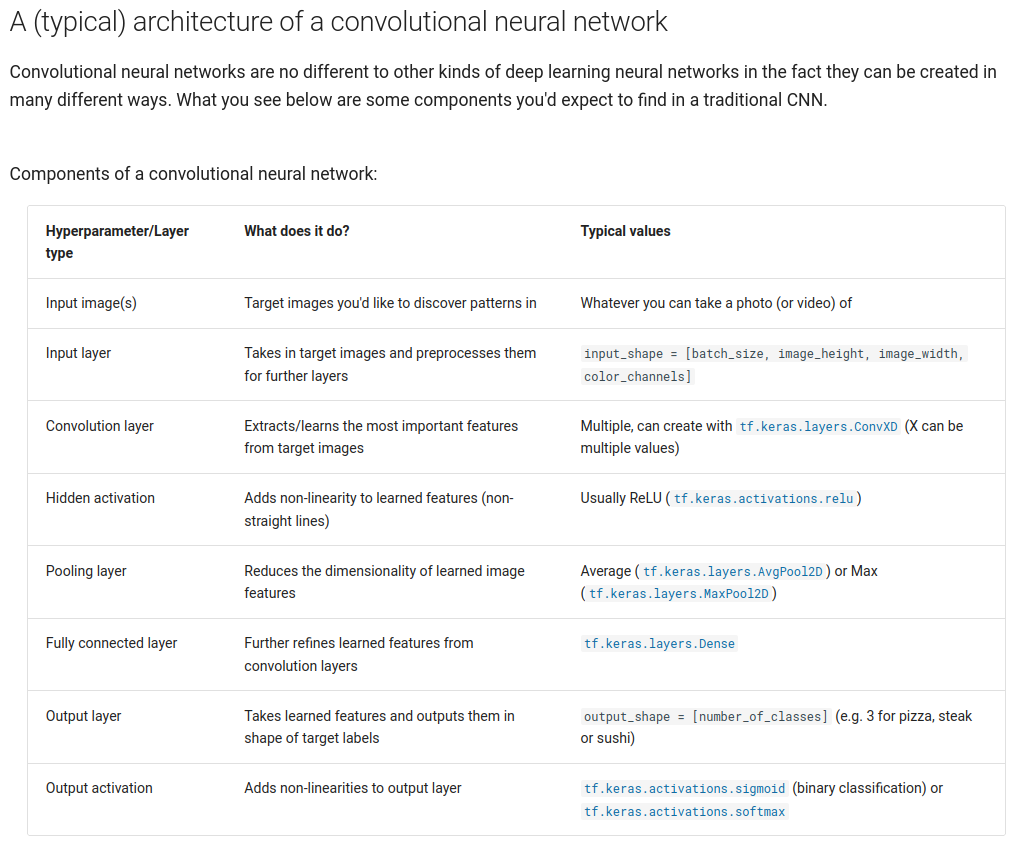![image.png]()

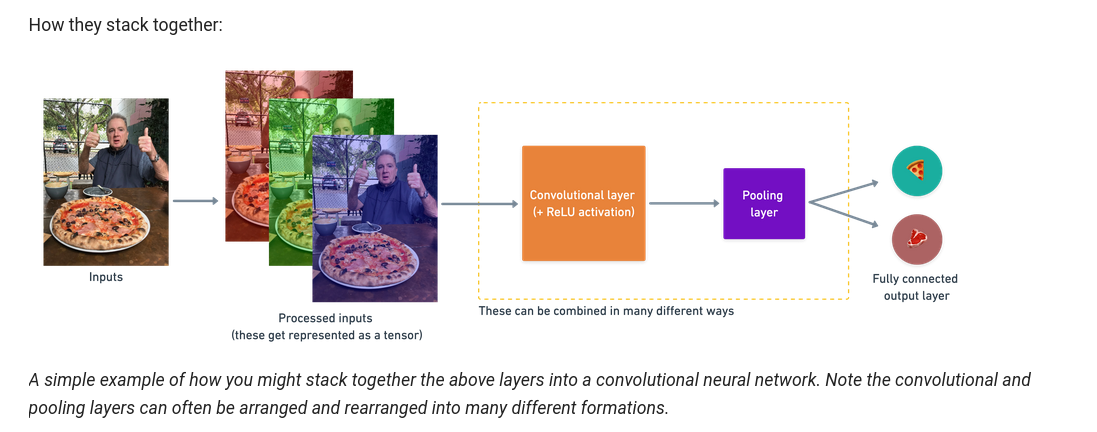

##An end-to-end example

An end-to-end example

We've checked out our data and found there's 750 training images, as well as 250 test images per class and they're all of various different shapes.

It's time to jump straight in the deep end.

Reading the original dataset authors paper, we see they used a Random Forest machine learning model and averaged 50.76% accuracy at predicting what different foods different images had in them.

From now on, that 50.76% will be our baseline.

🔑 Note: A baseline is a score or evaluation metric you want to try and beat. Usually you'll start with a simple model, create a baseline and try to beat it by increasing the complexity of the model. A really fun way to learn machine learning is to find some kind of modelling paper with a published result and try to beat it.



The code in the following cell replicates and end-to-end way to model our pizza_steak dataset with a convolutional neural network (CNN) using the components listed above.

There will be a bunch of things you might not recognize but step through the code yourself and see if you can figure out what it's doing.

We'll go through each of the steps later on in the notebook.

For reference, the model we're using replicates TinyVGG, the computer vision architecture which fuels the CNN explainer webpage.

📖 Resource: The architecture we're using below is a scaled-down version of VGG-16, a convolutional neural network which came 2nd in the 2014 ImageNet classification competition.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel value 1 and 0 . Also called Scaling/Normalization
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Set up the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process a time
                                               target_size=(224,224) , # convert all images to be 224x224
                                               class_mode="binary", #type of problem we are working on
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model ( same as TinyVGG https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3, # it can also be 3x3
                           activation="relu",
                           input_shape=(224,224,3)), #first layer specifies input shape (heigh, width, color channel)

    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, # Pool size can also be (2,2)
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.Conv2D(10,3, activation ="relu"), # activaiton = "relu" ==tf.keras.layers.Activaitons(tf.nn.relu)
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid") # Binary activation function

])

# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 249ms/step - loss: 0.6142 - accuracy: 0.6460 - val_loss: 0.4629 - val_accuracy: 0.7540
Epoch 2/5
47/47 [==============================] - 11s 227ms/step - loss: 0.4383 - accuracy: 0.8007 - val_loss: 0.4108 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 11s 225ms/step - loss: 0.3970 - accuracy: 0.8180 - val_loss: 0.3064 - val_accuracy: 0.8760
Epoch 4/5
47/47 [==============================] - 13s 268ms/step - loss: 0.3592 - accuracy: 0.8467 - val_loss: 0.3416 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 13s 269ms/step - loss: 0.3134 - accuracy: 0.8633 - val_loss: 0.3306 - val_accuracy: 0.8720


Nice! After 5 epochs, our model beat the baseline score of 50.76% accuracy (our model got ~85% accuaracy on the training set and ~85% accuracy on the test set).

However, our model only went through a binary classificaiton problem rather than all of the 101 classes in the Food101 dataset, so we can't directly compare these metrics. That being said, the results so far show that our model is learning something.

🛠 Practice: Step through each of the main blocks of code in the cell above, what do you think each is doing? It's okay if you're not sure, we'll go through this soon. In the meantime, spend 10-minutes playing around the incredible CNN explainer website. What do you notice about the layer names at the top of the webpage?

In [ ]:
# Check out architecture of our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

Cnn_Explainer : https://poloclub.github.io/cnn-explainer/


##Using the same model as before

To examplify how neural networks can be adapted to many different problems, let's see how a binary classification model we've previously built might work with our data.

    🔑 Note: If you haven't gone through the previous classification notebook, no troubles, we'll be bringing in the a simple 4 layer architecture used to separate dots replicated from the TensorFlow Playground environment.

We can use all of the same parameters in our previous model except for changing two things:

    The data - we're now working with images instead of dots.
    The input shape - we have to tell our neural network the shape of the images we're working with.
        A common practice is to reshape images all to one size. In our case, we'll resize the images to (224, 224, 3), meaning a height and width of 224 pixels and a depth of 3 for the red, green, blue colour channels.



In [ ]:
# Set random seed
tf.random.set_seed(42)
#Creatte a model to replicate TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation ="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")

])

# Compile the model:
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 15s 263ms/step - loss: 0.7450 - accuracy: 0.4940 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 12s 256ms/step - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 213ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 213ms/step - loss: 0.6932 - accuracy: 0.4840 - val_loss: 0.6931 - val_accuracy: 0.5000




Hmmm... our model ran but it doesn't seem like it learned anything. It only reaches 50% accuracy on the training and test sets which in a binary classification problem is as good as guessing.

Let's see the architecture.


In [ ]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_19 (Dense)            (None, 4)                 602116    
                                                                 
 dense_20 (Dense)            (None, 4)                 20        
                                                                 
 dense_21 (Dense)            (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________




Wow. One of the most noticeable things here is the much larger number of parameters in model_2 versus model_1.

model_2 has 602,141 trainable parameters where as model_1 has only 31,101. And despite this difference, model_1 still far and large out performs model_2.

    🔑 Note: You can think of trainable parameters as patterns a model can learn from data. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, a convolutional neural network seeks to sort out and learn the most important patterns in an image. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different features in an image.

Since our previous model didn't work, do you have any ideas of how we might make it work?

How about we increase the number of layers?

And maybe even increase the number of neurons in each layer?

More specifically, we'll increase the number of neurons (also called hidden units) in each dense layer from 4 to 100 and add an extra layer.

    🔑 Note: Adding extra layers or increasing the number of neurons in each layer is often referred to as increasing the complexity of your model.



In [ ]:
from tensorflow.python import train
# Set the random seed
tf.random.set_seed(42)
# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100, activation ="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 216ms/step - loss: 2.3217 - accuracy: 0.6400 - val_loss: 0.6623 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 11s 228ms/step - loss: 0.8233 - accuracy: 0.6847 - val_loss: 0.5990 - val_accuracy: 0.7700
Epoch 3/5
47/47 [==============================] - 10s 203ms/step - loss: 0.8065 - accuracy: 0.7107 - val_loss: 0.6934 - val_accuracy: 0.7480
Epoch 4/5
47/47 [==============================] - 11s 235ms/step - loss: 0.8917 - accuracy: 0.7160 - val_loss: 2.4994 - val_accuracy: 0.5320
Epoch 5/5
47/47 [==============================] - 10s 212ms/step - loss: 0.8288 - accuracy: 0.7313 - val_loss: 0.5917 - val_accuracy: 0.7660




Woah! Looks like our model is learning again. It got ~70% accuracy on the training set and ~70% accuracy on the validation set.

How does the architecute look?



In [ ]:
model_3.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_22 (Dense)            (None, 100)               15052900  
                                                                 
 dense_23 (Dense)            (None, 100)               10100     
                                                                 
 dense_24 (Dense)            (None, 100)               10100     
                                                                 
 dense_25 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________




My gosh, the number of trainable parameters has increased even more than model_2. And even with close to 500x (~15,000,000 vs. ~31,000) more trainable parameters, model_3 still doesn't out perform model_1.

This goes to show the power of convolutional neural networks and their ability to learn patterns despite using less parameters.




#Binary classification: Let's break it down

We just went through a whirlwind of steps:

    Become one with the data (visualize, visualize, visualize...)
    Preprocess the data (prepare it for a model)
    Create a model (start with a baseline)
    Fit the model
    Evaluate the model
    Adjust different parameters and improve model (try to beat your baseline)
    Repeat until satisfied

Let's step through each.


##1. Import and become one with the data

Whatever kind of data you're dealing with, it's a good idea to visualize at least 10-100 samples to start to building your own mental model of the data.

In our case, we might notice that the steak images tend to have darker colours where as pizza images tend to have a distinct circular shape in the middle. These might be patterns that our neural network picks up on.

You an also notice if some of your data is messed up (for example, has the wrong label) and start to consider ways you might go about fixing it.

    📖 Resource: To see how this data was processed into the file format we're using, see the preprocessing notebook.

If the visualization cell below doesn't work, make sure you've got the data by uncommenting the cell below.

In [ ]:
import zipfile
# Download zipfile of pizza steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip","r")
zip_ref.extractall()
zip_ref.close()

--2023-06-23 15:58:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.161.128, 74.125.126.128, 74.125.132.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.161.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   143MB/s    in 0.7s    

2023-06-23 15:58:51 (143 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:

import matplotlib.pyplot as plt
import random
import os

import pathlib
import numpy as np
import matplotlib.image as mpimg
data_dir = pathlib.Path("pizza_steak/train/")# Turn our training path into a python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))# Created a list of class_name from the subdirectories
print(class_names)

def view_random_image(target_dir , target_class):
  # Set up target directory (We will view images from here )
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img= mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape :{img.shape}") # Show the shape of image

  return img




['pizza' 'steak']


Image shape :(339, 512, 3)
Image shape :(384, 512, 3)


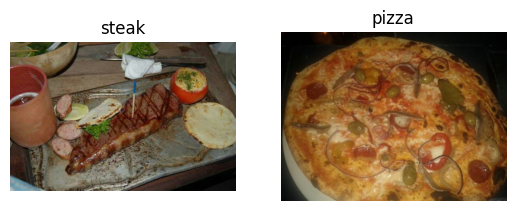

In [ ]:
# Visualize data (require function 'view_Random_image' aboove)
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

## 2.Preprocessing Data
One of the most important steps for a machine learning project is creating a training and test set.

In our case, our data is already split into training and test sets. Another option here might be to create a validation set as well, but we'll leave that for now.

For an image classification project, it's standard to have your data seperated into train and test directories with subfolders in each for each class.

To start we define the training and test directory paths.

In [ ]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"




Our next step is to turn our data into batches.

A batch is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:

    10,000 images (or more) might not fit into the memory of your processor (GPU).
    Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

A batch size of 32 is good for your health.

No seriously, there are many different batch sizes you could use but 32 has proven to be very effective in many different use cases and is often the default for many data preprocessing functions.

To turn our data into batches, we'll first create an instance of ImageDataGenerator for each of our datasets.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)




The ImageDataGenerator class helps us prepare our images into batches as well as perform transformations on them as they get loaded into the model.

You might've noticed the rescale parameter. This is one example of the transformations we're doing.

Remember from before how we imported an image and it's pixel values were between 0 and 255?

The rescale parameter, along with 1/255. is like saying "divide all of the pixel values by 255". This results in all of the image being imported and their pixel values being normalized (converted to be between 0 and 1).

    🔑 Note: For more transformation options such as data augmentation (we'll see this later), refer to the ImageDataGenerator documentation.

Now we've got a couple of ImageDataGenerator instances, we can load our images from their respective directories using the flow_from_directory method.


In [ ]:
# Turn it into batches :
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.




Wonderful! Looks like our training dataset has 1500 images belonging to 2 classes (pizza and steak) and our test dataset has 500 images also belonging to 2 classes.

Some things to here:

    Due to how our directories are structured, the classes get inferred by the subdirectory names in train_dir and test_dir.
    The target_size parameter defines the input size of our images in (height, width) format.
    The class_mode value of 'binary' defines our classification problem type. If we had more than two classes, we would use 'categorical'.
    The batch_size defines how many images will be in each batch, we've used 32 which is the same as the default.

We can take a look at our batched images and labels by inspecting the train_data object.


In [ ]:
# Get sample of the training data batch
images, labels = train_data.next() # get the next batch of images/labels
len(images), len(labels)

(32, 32)



Wonderful, it seems our images and labels are in batches of 32.

Let's see what the images look like.


In [ ]:
images[:2], images[0].shape

(array([[[[0.00784314, 0.02745098, 0.00392157],
          [0.01176471, 0.03137255, 0.00784314],
          [0.00392157, 0.02352941, 0.        ],
          ...,
          [0.12156864, 0.03921569, 0.01960784],
          [0.11764707, 0.03529412, 0.01568628],
          [0.11764707, 0.04313726, 0.02745098]],
 
         [[0.00392157, 0.02352941, 0.        ],
          [0.01176471, 0.03137255, 0.00784314],
          [0.00392157, 0.02352941, 0.        ],
          ...,
          [0.1137255 , 0.03137255, 0.01176471],
          [0.11764707, 0.03529412, 0.01568628],
          [0.1137255 , 0.03921569, 0.02352941]],
 
         [[0.00392157, 0.02352941, 0.        ],
          [0.01568628, 0.03529412, 0.01176471],
          [0.00784314, 0.02745098, 0.00392157],
          ...,
          [0.10980393, 0.02745098, 0.00784314],
          [0.12156864, 0.03921569, 0.01960784],
          [0.10980393, 0.03529412, 0.01960784]],
 
         ...,
 
         [[0.81568635, 0.73333335, 0.65882355],
          [0.81960



Due to our rescale parameter, the images are now in (224, 224, 3) shape tensors with values between 0 and 1.

How about the labels?


In [ ]:
labels

array([1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.],
      dtype=float32)



Due to the class_mode parameter being 'binary' our labels are either 0 (pizza) or 1 (steak).

Now that our data is ready, our model is going to try and figure out the patterns between the image tensors and the labels.


## 3. Create a model (start with a baseline)
You might be wondering what your default model architecture should be.

And the truth is, there's many possible answers to this question.

A simple heuristic for computer vision models is to use the model architecture which is performing best on ImageNet (a large collection of diverse images to benchmark different computer vision models).

However, to begin with, it's good to build a smaller model to acquire a baseline result which you try to improve upon.

    🔑 Note: In deep learning a smaller model often refers to a model with less layers than the state of the art (SOTA). For example, a smaller model might have 3-4 layers where as a state of the art model, such as, ResNet50 might have 50+ layers.

In our case, let's take a smaller version of the model that can be found on the CNN explainer website (model_1 from above) and build a 3 layer convolutional neural network.

In [ ]:
# Make the creating of our model a little easier:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense , Flatten , Conv2D , MaxPooling2D, Activation
from tensorflow.keras import Sequential

In [ ]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size = 3,
           strides = 1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)), # input layer (specify input shape)
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")
])



Great! We've got a simple convolutional neural network architecture ready to go.

And it follows the typical CNN structure of:

Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output


Let's discuss some of the components of the Conv2D layer:

    The "2D" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
    filters - these are the number of "feature extractors" that will be moving over our images.
    kernel_size - the size of our filters, for example, a kernel_size of (3, 3) (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
    stride - the number of pixels a filter will move across as it covers the image. A stride of 1 means the filter moves across each pixel 1 by 1. A stride of 2 means it moves 2 pixels at a time.
    padding - this can be either 'same' or 'valid', 'same' adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as 'valid' (default) cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.

What's a "feature"?

A feature can be considered any significant part of an image. For example, in our case, a feature might be the circular shape of pizza. Or the rough edges on the outside of a steak.

It's important to note that these features are not defined by us, instead, the model learns them as it applies different filters across the image.

    📖 Resources: For a great demonstration of these in action, be sure to spend some time going through the following:

    CNN Explainer Webpage - a great visual overview of many of the concepts we're replicating here with code.
    A guide to convolutional arithmetic for deep learning - a phenomenal introduction to the math going on behind the scenes of a convolutional neural network.
    For a great explanation of padding, see this Stack Overflow answer.

Now our model is ready, let's compile it.

In [ ]:
# Lets compile our model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])



Since we're working on a binary classification problem (pizza vs. steak), the loss function we're using is 'binary_crossentropy', if it was mult-iclass, we might use something like 'categorical_crossentropy'.

Adam with all the default settings is our optimizer and our evaluation metric is accuracy.


## 4.Fit a Model

Our model is compiled, time to fit it.

You'll notice two new parameters here:

    steps_per_epoch - this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of train_data (1500 images in batches of 32 = 1500/32 = ~47 steps)
    validation_steps - same as above, except for the validation_data parameter (500 test images in batches of 32 = 500/32 = ~16 steps)


In [ ]:
# Check the lengths of training and test data genarator
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 294ms/step - loss: 0.7876 - accuracy: 0.6560 - val_loss: 0.4508 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 11s 230ms/step - loss: 0.4194 - accuracy: 0.8140 - val_loss: 0.3736 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 11s 232ms/step - loss: 0.3012 - accuracy: 0.8853 - val_loss: 0.3721 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 11s 236ms/step - loss: 0.1433 - accuracy: 0.9627 - val_loss: 0.4289 - val_accuracy: 0.8000
Epoch 5/5
47/47 [==============================] - 14s 305ms/step - loss: 0.0735 - accuracy: 0.9867 - val_loss: 0.4273 - val_accuracy: 0.8240


## 5. Evaluate the Model
Ohh yes . Our model is learning something
Let's check out our training curves

<Axes: >

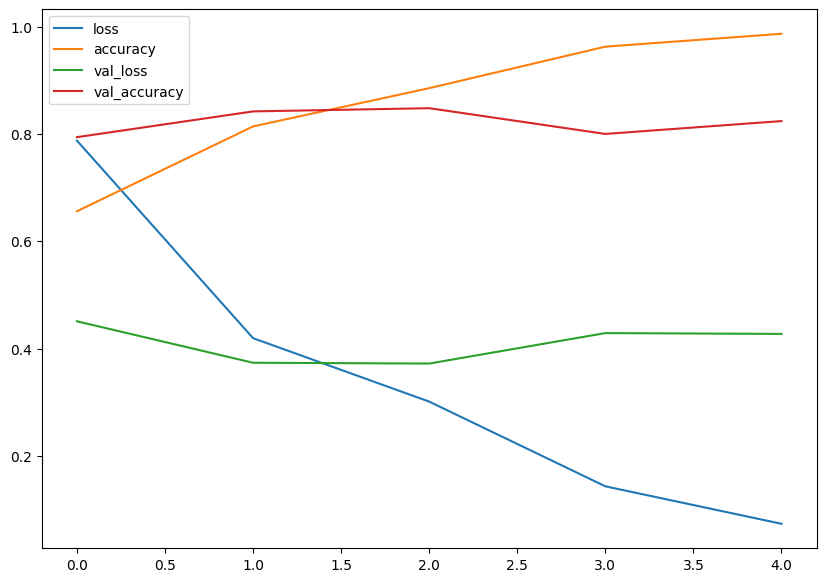

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

Hmm, judging by our loss curves, it looks like our model is overfitting the training dataset.


    🔑 Note: When a model's validation loss starts to increase, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished.

To further inspect our model's training performance, let's separate the accuracy and loss curves.

In [ ]:
def plot_loss_curves(history):
  """Returns seperate loss curves for training and validation metrics"""
  loss= history.history['loss']
  val_loss = history.history['val_loss']
  accuracy=history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs=range(len(history.history['loss']))


  # Plot loss
  plt.plot(epochs , loss, label = "training_loss")
  plt.plot(epochs , val_loss , label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy, label = "training accuracy")
  plt.plot(epochs, val_accuracy, label = "validation accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

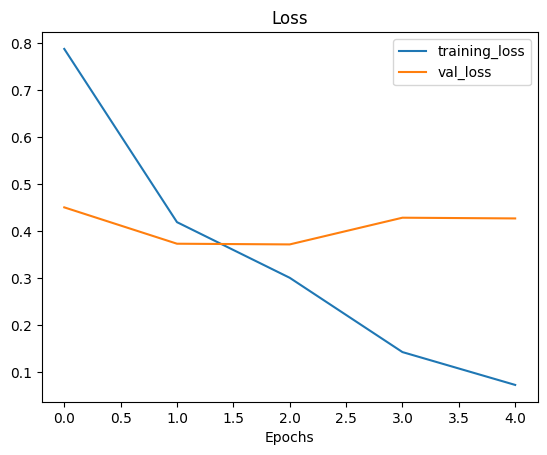

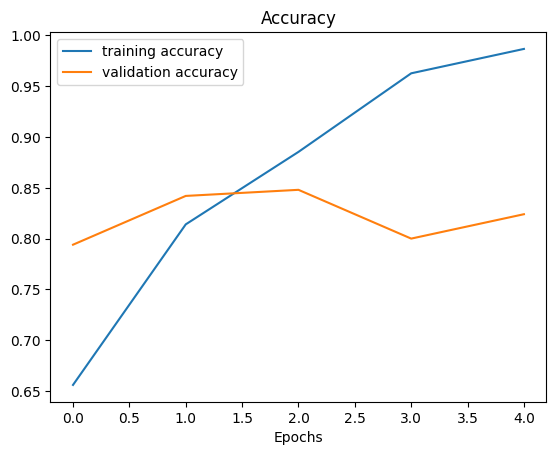

In [ ]:
# Check out loss curve for model_4
plot_loss_curves(history_4)

The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting.

In [ ]:
# Check out our model's architecture
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


## 6. Adjust the Model's Prameters:

6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps: 0. Create a basline.

    Beat the baseline by overfitting a larger model.
    Reduce overfitting.

So far we've gone through steps 0 and 1.

And there are even a few more things we could try to further overfit our model:

    Increase the number of convolutional layers.
    Increase the number of convolutional filters.
    Add another dense layer to the output of our flattened layer.

But what we'll do instead is focus on getting our model's training curves to better align with eachother, in other words, we'll take on step 2.

Why is reducing overfitting important?

When a model performs too well on training data and poorly on unseen data, it's not much use to us if we wanted to use it in the real world.


6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps: 0. Create a basline.

    Beat the baseline by overfitting a larger model.
    Reduce overfitting.

So far we've gone through steps 0 and 1.

And there are even a few more things we could try to further overfit our model:

    Increase the number of convolutional layers.
    Increase the number of convolutional filters.
    Add another dense layer to the output of our flattened layer.

But what we'll do instead is focus on getting our model's training curves to better align with eachother, in other words, we'll take on step 2.

Why is reducing overfitting important?

When a model performs too well on training data and poorly on unseen data, it's not much use to us if we wanted to use it in the real world.

Say we were building a pizza vs. steak food classifier app, and our model performs very well on our training data but when users tried it out, they didn't get very good results on their own food images, is that a good experience?

Not really...

So for the next few models we build, we're going to adjust a number of parameters and inspect the training curves along the way.

Namely, we'll build 2 more models:

    A ConvNet with max pooling
    A ConvNet with max pooling and data augmentation

For the first model, we'll follow the modified basic CNN structure:

Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output

Let's built it. It'll have the same structure as model_4 but with a MaxPool2D() layer after each convolutional layer.


In [ ]:
# Create the model ( this can be aour baseline , a 3 layer CNN)
from tensorflow.keras.layers import MaxPool2D
model_5 = Sequential([
    Conv2D(10,3,activation ="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),# Reduce number of features by half
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])



Woah, we've got another layer type we haven't seen before.

If convolutional layers learn the features of an image you can think of a Max Pooling layer as figuring out the most important of those features. We'll see this an example of this in a moment.


In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_5=model_5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 244ms/step - loss: 0.6416 - accuracy: 0.6267 - val_loss: 0.4412 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 11s 224ms/step - loss: 0.4379 - accuracy: 0.7993 - val_loss: 0.3510 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 11s 231ms/step - loss: 0.4311 - accuracy: 0.8093 - val_loss: 0.3273 - val_accuracy: 0.8860
Epoch 4/5
47/47 [==============================] - 10s 223ms/step - loss: 0.3943 - accuracy: 0.8207 - val_loss: 0.3153 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 10s 220ms/step - loss: 0.3567 - accuracy: 0.8447 - val_loss: 0.3044 - val_accuracy: 0.8880




Okay, it looks like our model with max pooling (model_5) is performing worse on the training set but better on the validation set.

Before we checkout its training curves, let's check out its architecture.


In [ ]:
# Check out our model architecture
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)      



Do you notice what's going on here with the output shape in each MaxPooling2D layer?

It gets halved each time. This is effectively the MaxPooling2D layer taking the outputs of each Conv2D layer and saying "I only want the most important features, get rid of the rest".

The bigger the pool_size parameter, the more the max pooling layer will squeeze the features out of the image. However, too big and the model might not be able to learn anything.

The results of this pooling are seen in a major reduction of total trainable parameters (8,861 in model_5 and 477,431 in model_4).

Time to check out the loss curves.


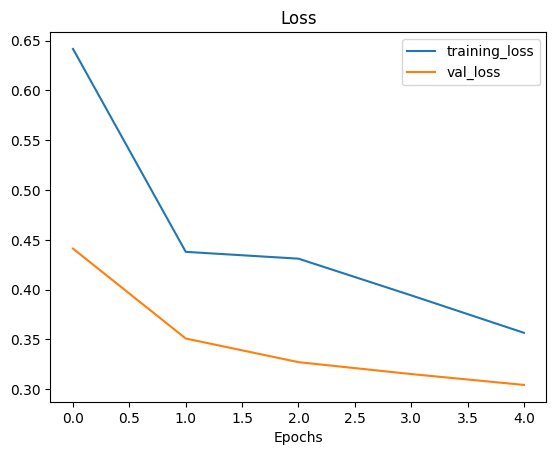

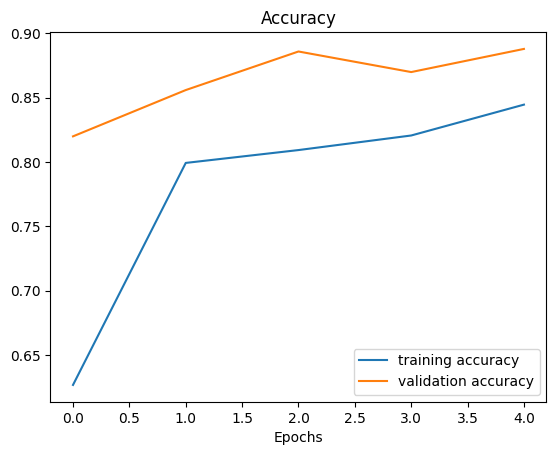

In [ ]:
plot_loss_curves(history_5)



Nice! We can see the training curves get a lot closer to eachother. However, our the validation loss looks to start increasing towards the end and in turn potentially leading to overfitting.

Time to dig into our bag of tricks and try another method of overfitting prevention, data augmentation.

First, we'll see how it's done with code then we'll discuss what it's doing.

To implement data augmentation, we'll have to reinstantiate our ImageDataGenerator instances.


In [ ]:
# Create image data generator training instances with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range = 20,# rotate the image slightly between 0 and 20 degrees ( note : this is an int not float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image width ways
                                             horizontal_flip=True)# flip the image n the horizontal axis
# Create ImageDataGenerator training instance without data Augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data Augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory
print("Augmaneted training images: ")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size = 32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # Dont Shuffle for demonstration purposes , usually a good thing  to shuffle

# Create non-augmented data batches
print("Non-augmented data training images: ")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle = False)

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             )

Augmaneted training images: 
Found 1500 images belonging to 2 classes.
Non-augmented data training images: 
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.




Better than talk about data augmentation, how about we see it?

(remember our motto? visualize, visualize, visualize...)


In [ ]:
# Get  data batches samples
images, labels= train_data.next()
augmented_images, augmented_labels=train_data_augmented.next() # Note: labels are not augmented they stay the same

(-0.5, 223.5, 223.5, -0.5)

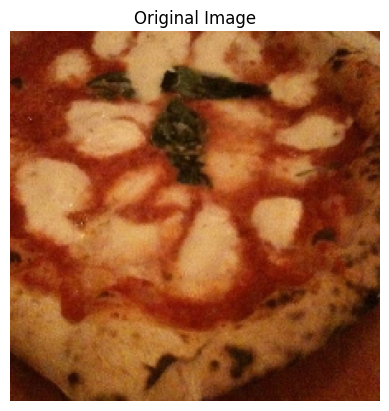

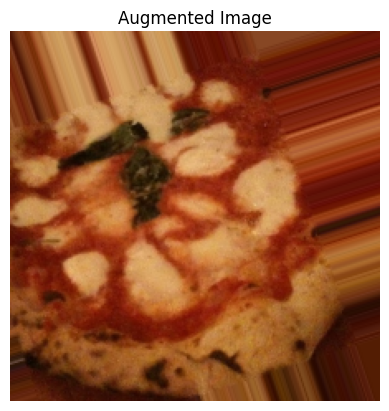

In [ ]:
# Show original image and augmented image
random_number=random.randint(0,32) # We are making batches of size 32 , so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis(False)



After going through a sample of original and augmented images, you can start to see some of the example transformations on the training images.

Notice how some of the augmented images look like slightly warped versions of the original image. This means our model will be forced to try and learn patterns in less-than-perfect images, which is often the case when using real-world images.

    🤔 Question: Should I use data augmentation? And how much should I augment?

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

As for how much to data augment, there's no set practice for this. Best to check out the options in the ImageDataGenerator class and think about how a model in your use case might benefit from some data augmentation.

Now we've got augmented data, let's try and refit a model on it and see how it affects training.

We'll use the same model as model_5.


In [ ]:
# Create the model(same as model_5)
model_6 = Sequential([
    Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")

])
# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 522ms/step - loss: 0.6960 - accuracy: 0.4847 - val_loss: 0.6834 - val_accuracy: 0.7260
Epoch 2/5
47/47 [==============================] - 25s 534ms/step - loss: 0.6980 - accuracy: 0.5113 - val_loss: 0.6766 - val_accuracy: 0.7560
Epoch 3/5
47/47 [==============================] - 25s 536ms/step - loss: 0.6984 - accuracy: 0.5680 - val_loss: 0.6291 - val_accuracy: 0.7500
Epoch 4/5
47/47 [==============================] - 25s 532ms/step - loss: 0.6473 - accuracy: 0.6667 - val_loss: 0.5516 - val_accuracy: 0.7320
Epoch 5/5
47/47 [==============================] - 25s 525ms/step - loss: 0.5985 - accuracy: 0.7013 - val_loss: 0.6494 - val_accuracy: 0.6100




    🤔 Question: Why didn't our model get very good results on the training set to begin with?

It's because when we created train_data_augmented we turned off data shuffling using shuffle=False which means our model only sees a batch of a single kind of images at a time.

For example, the pizza class gets loaded in first because it's the first class. Thus it's performance is measured on only a single class rather than both classes. The validation data performance improves steadily because it contains shuffled data.

Since we only set shuffle=False for demonstration purposes (so we could plot the same augmented and non-augmented image), we can fix this by setting shuffle=True on future data generators.

You may have also noticed each epoch taking longer when training with augmented data compared to when training with non-augmented data (~25s per epoch vs. ~10s per epoch).

This is because the ImageDataGenerator instance augments the data as it's loaded into the model. The benefit of this is that it leaves the original images unchanged. The downside is that it takes longer to load them in.

    🔑 Note: One possible method to speed up dataset manipulation would be to look into TensorFlow's parrallel reads and buffered prefecting options.



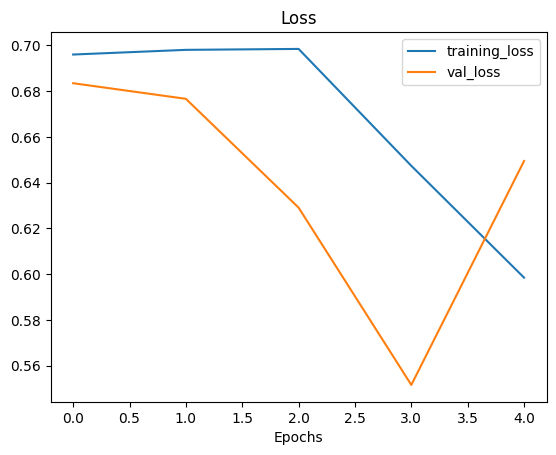

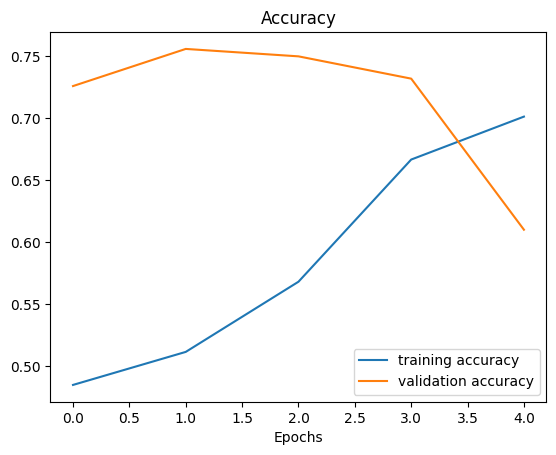

In [ ]:
# Check model's performance  history training on augmented data
plot_loss_curves(history_6)



It seems our validation loss curve is heading in the right direction but it's a bit jumpy (the most ideal loss curve isn't too spiky but a smooth descent, however, a perfectly smooth loss curve is the equivalent of a fairytale).

Let's see what happens when we shuffle the augmented training data.


In [ ]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224,224),
                                                                            batch_size=32,
                                                                            class_mode="binary",
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [ ]:
model_7 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
#Fit the model
history_7=model_7.fit(train_data_augmented_shuffled,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented_shuffled),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 530ms/step - loss: 0.6391 - accuracy: 0.6393 - val_loss: 0.5200 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 24s 519ms/step - loss: 0.5328 - accuracy: 0.7420 - val_loss: 0.4047 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 24s 522ms/step - loss: 0.4866 - accuracy: 0.7760 - val_loss: 0.3996 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 26s 552ms/step - loss: 0.4930 - accuracy: 0.7700 - val_loss: 0.3857 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 24s 512ms/step - loss: 0.4845 - accuracy: 0.7707 - val_loss: 0.3325 - val_accuracy: 0.8560


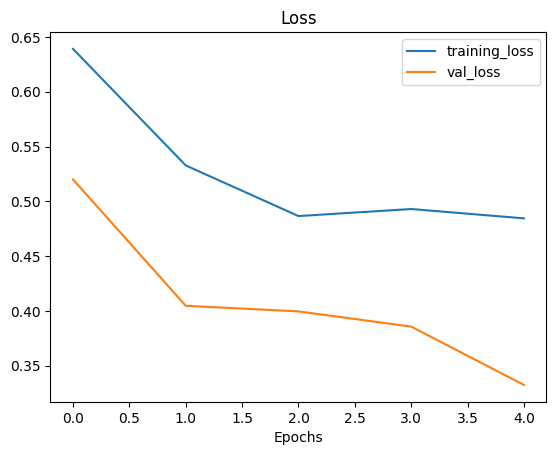

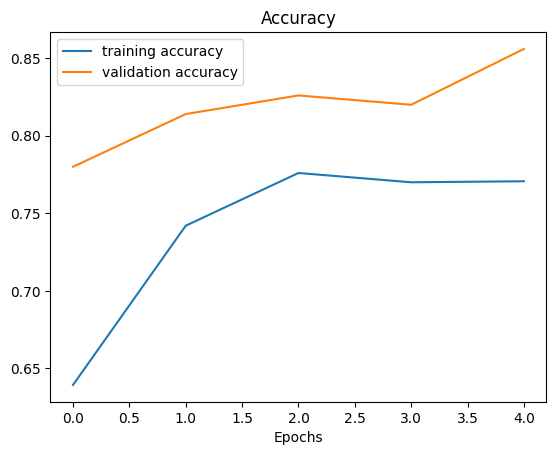

In [ ]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)



Notice with model_7 how the performance on the training dataset improves almost immediately compared to model_6. This is because we shuffled the training data as we passed it to the model using the parameter shuffle=True in the flow_from_directory method.

This means the model was able to see examples of both pizza and steak images in each batch and in turn be evaluated on what it learned from both images rather than just one kind.

Also, our loss curves look a little bit smoother with shuffled data (comparing history_6 to history_7).


## 7. Repeat Until Satisfied

We've trained a few model's on our dataset already and so far they're performing pretty good.

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

    Increase the number of model layers (e.g. add more convolutional layers).
    Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
    Train for longer (more epochs).
    Finding an ideal learning rate.
    Get more data (give the model more opportunities to learn).
    Use transfer learning to leverage what another image model has learned and adjust it for our own use case.

Adjusting each of these settings (except for the last two) during model development is usually referred to as hyperparameter tuning.

You can think of hyperparameter tuning as simialr to adjusting the settings on your oven to cook your favourite dish. Although your oven does most of the cooking for you, you can help it by tweaking the dials.

Let's go back to right where we started and try our original model (model_1 or the TinyVGG architecture from CNN explainer).

In [ ]:
import tensorflow as tf
model_8 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_8=model_8.fit(train_data_augmented_shuffled,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented_shuffled),
                      validation_data=test_data,
                      validation_steps=len(test_data))



Epoch 1/5
47/47 [==============================] - 30s 580ms/step - loss: 0.6363 - accuracy: 0.6340 - val_loss: 0.5129 - val_accuracy: 0.7300
Epoch 2/5
47/47 [==============================] - 26s 549ms/step - loss: 0.5393 - accuracy: 0.7507 - val_loss: 0.4045 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 25s 531ms/step - loss: 0.5090 - accuracy: 0.7593 - val_loss: 0.3924 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 25s 543ms/step - loss: 0.4856 - accuracy: 0.7753 - val_loss: 0.3399 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 27s 567ms/step - loss: 0.4615 - accuracy: 0.7907 - val_loss: 0.3406 - val_accuracy: 0.8520




    🔑 Note: You might've noticed we used some slightly different code to build model_8 as compared to model_1. This is because of the imports we did before, such as from tensorflow.keras.layers import Conv2D reduce the amount of code we had to write. Although the code is different, the architectures are the same.



In [ ]:
model_8.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_41 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_43 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

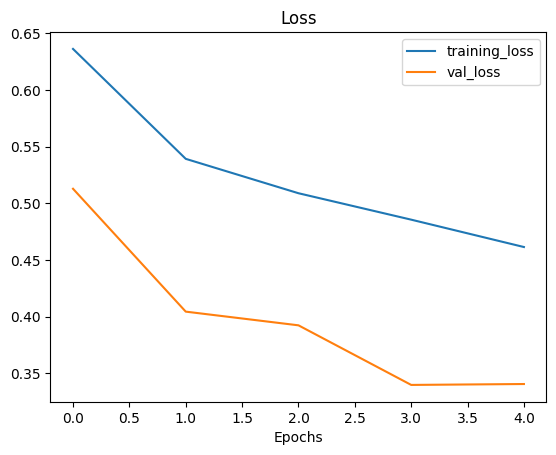

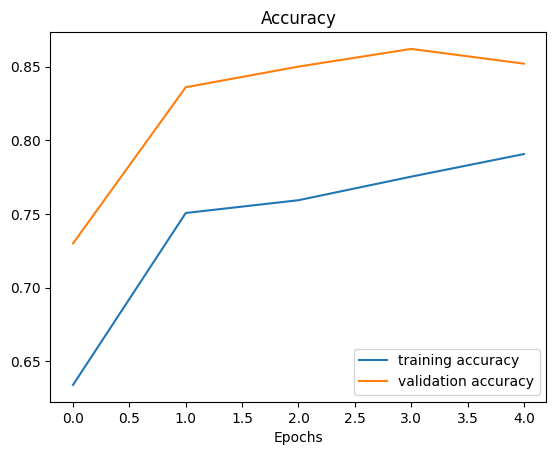

In [ ]:
plot_loss_curves(history_8)



Hmm, our training curves are looking good, but our model's performance on the training and test sets didn't improve much compared to the previous model.

Taking another loook at the training curves, it looks like our model's performance might improve if we trained it a little longer (more epochs).

Perhaps that's something you like to try?


## Making a predction with our trained model

What good is a trained model if you can't make predictions with it?

To really test it out, we'll upload a couple of our own images and see how the model goes.

First, let's remind ourselves of the classnames and view the image we're going to test on.

In [ ]:
# Classes we are working with
print(class_names)

['pizza' 'steak']


The first test image we're going to use is a delicious steak I cooked the other day

--2023-06-23 16:23:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2023-06-23 16:23:15 (32.5 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

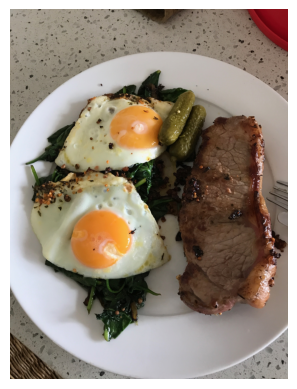

In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [ ]:
# Check the shape of steak
steak.shape

(4032, 3024, 3)



Since our model takes in images of shapes (224, 224, 3), we've got to reshape our custom image to use it with our model.

To do so, we can import and decode our image using tf.io.read_file (for readining files) and tf.image (for resizing our image and turning it into a tensor).

    🔑 Note: For your model to make predictions on unseen data, for example, your own custom images, the custom image has to be in the same shape as your model has been trained on. In more general terms, to make predictions on custom data it has to be in the same form that your model has been trained on.


In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(file_name, img_shape=224):
  """
  REads an image from filename , turns it into a tensor
  and reshapes it to (img_shape, img_shape, color_channel)

  """

  # Read in target file(an image):
  img = tf.io.read_file(file_name)

  # DEcode the read file into a tensor & ensure 3 color channels
  # (Our model is trained on images with 3 color channel and sometimes images have 4 color channels)
  img = tf.image.decode_image(img,channels=3)
  # REsize the image (to the same size our model was trained on)
  img = tf.image.resize(img , size=[img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img




Now we've got a function to load our custom image, let's load it in.


In [ ]:
# Load in a preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05



Wonderful, our image is in tensor format, time to try it with our model!


In [ ]:
model_8.predict(steak)

ValueError: ignored



There's one more problem...

Although our image is in the same shape as the images our model has been trained on, we're still missing a dimension.

Remember how our model was trained in batches?

Well, the batch size becomes the first dimension.

So in reality, our model was trained on data in the shape of (batch_size, 224, 224, 3).

We can fix this by adding an extra to our custom image tensor using tf.expand_dims.


In [ ]:
# Ad an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak=tf.expand_dims(steak,axis=0) # Add an extra dimension at 0 axis
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimesison: {steak.shape}")


Shape before new dimension: (224, 224, 3)
Shape after new dimesison: (1, 224, 224, 3)




Our custom image has a batch size of 1! Let's make a prediction on it.


In [ ]:
pred = model_8.predict(steak)
pred

1/1 [==============================] - 0s 22ms/step


array([[0.74865997]], dtype=float32)



Ahh, the predictions come out in prediction probability form. In other words, this means how likely the image is to be one class or another.

Since we're working with a binary classification problem, if the prediction probability is over 0.5, according to the model, the prediction is most likely to be the postive class (class 1).

And if the prediction probability is under 0.5, according to the model, the predicted class is most likely to be the negative class (class 0).

    🔑 Note: The 0.5 cutoff can be adjusted to your liking. For example, you could set the limit to be 0.8 and over for the positive class and 0.2 for the negative class. However, doing this will almost always change your model's performance metrics so be sure to make sure they change in the right direction.

But saying positive and negative class doesn't make much sense when we're working with pizza 🍕 and steak 🥩...

So let's write a little function to convert predictions into their class names and then plot the target image.


In [ ]:
# REmind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class  by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  ımports an image located at filename , makes a prediction on it with
  a trained model and plots the image with the predicted class as the title

  """

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img,axis=0))

  # Get the predicted classes
  pred_class = class_names[int(tf.round(pred)[0][0])]
  # Plot the image and predicted classes
  plt.imshow(img)
  plt.title(f"prediction : {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 21ms/step


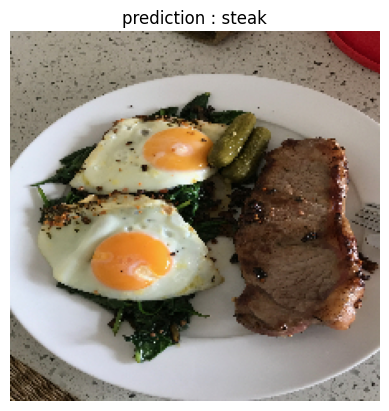

In [ ]:
pred_and_plot(model_8, "03-steak.jpeg", class_names)



Nice! Our model got the prediction right.

The only downside of working with food is this is making me hungry.

Let's try one more image.


--2023-06-23 16:49:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2023-06-23 16:49:44 (41.5 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 64ms/step


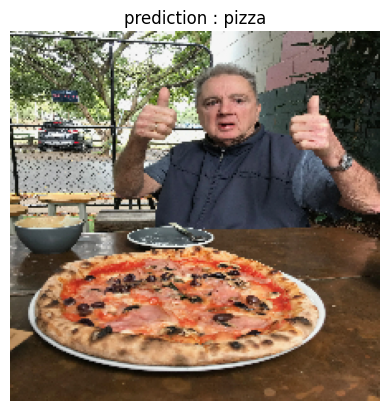

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

#Multiclass Classification



We've referenced the TinyVGG architecture from the CNN Explainer website multiple times through this notebook, however, the CNN Explainer website works with 10 different image classes, where as our current model only works with two classes (pizza and steak).

    🛠 Practice: Before scrolling down, how do you think we might change our model to work with 10 classes of the same kind of images? Assume the data is in the same style as our two class problem.

Remember the steps we took before to build our pizza 🍕 vs. steak 🥩 classifier?

How about we go through those steps again, except this time, we'll work with 10 different types of food.

    Become one with the data (visualize, visualize, visualize...)
    Preprocess the data (prepare it for a model)
    Create a model (start with a baseline)
    Fit the model
    Evaluate the model
    Adjust different parameters and improve model (try to beat your baseline)
    Repeat until satisfied


##1. Import and become with data
Again, we've got a subset of the Food101 dataset. In addition to the pizza and steak images, we've pulled out another eight classes.

In [2]:
import zipfile
# Download the zip file of 10_food_classes images
# See how this data was created https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2023-07-05 15:48:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.128, 142.251.175.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  23.2MB/s    in 23s     

2023-07-05 15:49:01 (21.5 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



Now lets check out the directories for 10 classes

In [4]:
import os
for dirpath , dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.

Looking Good! We will adjust the train and test directory paths:

In [6]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

And Get the class names from the subdirectories

In [10]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

In [11]:
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


How about we visualize a an image from the training set?

Image shape :(512, 512, 3)


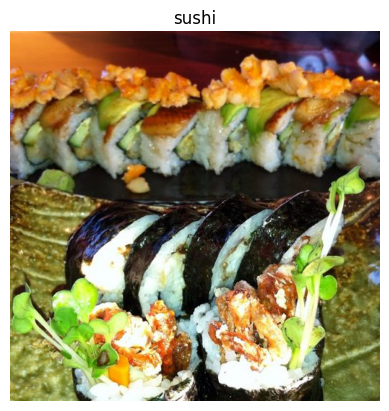

In [14]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir , target_class):
  # Set up target directory (We will view images from here )
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img= mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape :{img.shape}") # Show the shape of image

  return img
img = view_random_image(target_dir=train_dir,
                        target_class = random.choice(class_names))

# # 2. Preprocess the data (prepare it for a model)

After going through a handful of images (it's good to visualize at least 10-100different examples ), it looks like our data directories are set up correctly

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale the data and create data genarator instances :
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical") # changed to categorical
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


 AS with binary classification , we have creator image generators. The main challange this time is that we have changed the class_mode parameterto 'categorical' because we are dealing with 10 classes of images.

 Everything else like rescaling the images, creating the batch size and target image size stay the same




Question :: Why is the image size 224x224? This could actually be size we wanted is a very common   is a very commmon size for preprocessing images to. Depending on your problem , yu might use bigger or smaller values

## 3. Create  a model (start with a baseline )
 We can use the same model (TinyVGG) we used for the binary classification problem for our multi-class classification problem with a couple of small tweaks.

 Namely:
* Changing the output layer to use have 10 output neurons(the same number as the number of classes we have)
* Changing the output layer to use 'softmax' activation instead of 'sigmod'
* Changing the loss function from 'binary_crossentropy' to categorical_crossentropy'

---



In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPool2D, Flatten, Dense
# create our model :
model_9= Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    Conv2D(10, 3, activation ="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])
# Compile the model
model_9.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

## 4. Fit the model

In [24]:
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 72s 244ms/step - loss: 2.1361 - accuracy: 0.2215 - val_loss: 2.0239 - val_accuracy: 0.2688
Epoch 2/5
235/235 [==============================] - 53s 227ms/step - loss: 1.9134 - accuracy: 0.3349 - val_loss: 1.9815 - val_accuracy: 0.2820
Epoch 3/5
235/235 [==============================] - 52s 222ms/step - loss: 1.5662 - accuracy: 0.4716 - val_loss: 1.9127 - val_accuracy: 0.3480
Epoch 4/5
235/235 [==============================] - 52s 219ms/step - loss: 0.9704 - accuracy: 0.6848 - val_loss: 2.2777 - val_accuracy: 0.3228
Epoch 5/5
235/235 [==============================] - 61s 259ms/step - loss: 0.4213 - accuracy: 0.8688 - val_loss: 3.1284 - val_accuracy: 0.3196


Why fo you think  each epoch takes longer than when we wwere working only 2 classes of images  ?
It is because we are now dealing more images than we were before. We have got 10 classes with 750 training images and 250 avlidation images each tottalling 10,000 images.
Whereas when we had two classes , we had 1500 training images and 500 validation images , totalling 2000

# 5.Evaluate the model
We have just trained a model on 10 different classes of food images , lets see how it went

In [25]:
# Evaluate on the test data
model_9.evaluate(test_data)

79/79 [==============================] - 14s 172ms/step - loss: 3.1284 - accuracy: 0.3196


[3.1283810138702393, 0.319599986076355]

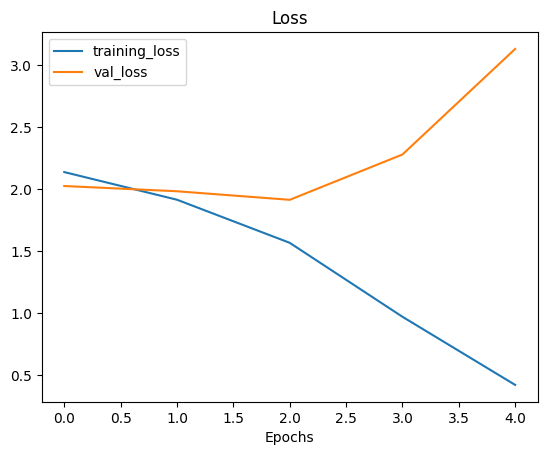

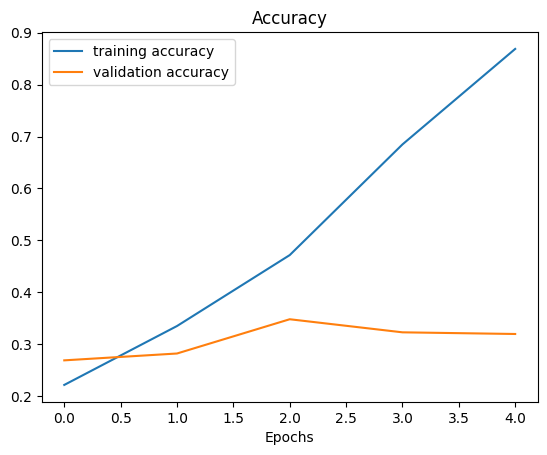

In [26]:
# Check out the mode's loss curves on the 10 classes
def plot_loss_curves(history):
  """Returns seperate loss curves for training and validation metrics"""
  loss= history.history['loss']
  val_loss = history.history['val_loss']
  accuracy=history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs=range(len(history.history['loss']))


  # Plot loss
  plt.plot(epochs , loss, label = "training_loss")
  plt.plot(epochs , val_loss , label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy, label = "training accuracy")
  plt.plot(epochs, val_accuracy, label = "validation accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()
plot_loss_curves(history_9)

Thats quite the gap between training and validation accuracy.
 It seem our model had overfitting.

## 6. Adjust the model parameters.

So our next steps will be to try and prevent our model overfitting. A couple of ways to prevent overfitting include:

  * Get more data - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.
  * Simplify model - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.
  * Use data augmentation - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
  * Use transfer learning - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.


First , Lets reduce the layer numbers.

In [32]:
# Try a simplified model (removed two layers)
model_10= Sequential([
    Conv2D(10, 3 , activation="relu", input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])
model_10.compile(loss="categorical_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
history_10 = model_10.fit(train_data,
             epochs=5,
             steps_per_epoch=len(train_data),
             validation_data=test_data,
             validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 62s 257ms/step - loss: 2.0908 - accuracy: 0.2413 - val_loss: 1.9520 - val_accuracy: 0.3116
Epoch 2/5
235/235 [==============================] - 59s 253ms/step - loss: 1.7140 - accuracy: 0.4247 - val_loss: 1.9455 - val_accuracy: 0.3300
Epoch 3/5
235/235 [==============================] - 50s 214ms/step - loss: 1.2159 - accuracy: 0.6139 - val_loss: 2.1346 - val_accuracy: 0.3008
Epoch 4/5
235/235 [==============================] - 51s 217ms/step - loss: 0.6579 - accuracy: 0.8044 - val_loss: 2.3754 - val_accuracy: 0.3148
Epoch 5/5
235/235 [==============================] - 49s 210ms/step - loss: 0.3064 - accuracy: 0.9255 - val_loss: 2.8231 - val_accuracy: 0.3076


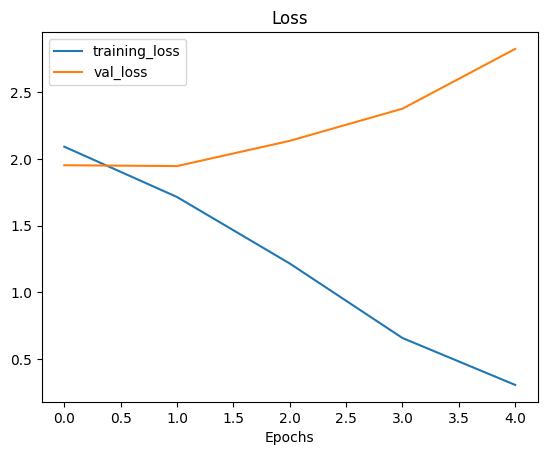

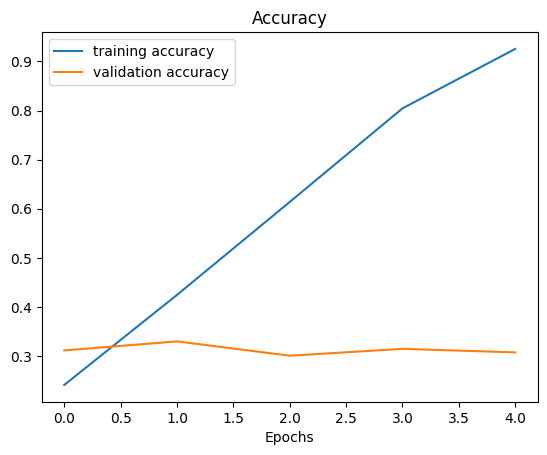

In [34]:
plot_loss_curves(history_10)

Our model is still looking having overfitting problem even we set it with simpler model
Lets try data augmentation now :

In [35]:
# Create augmanted data  generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # this is an int , not float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


We have augmented data now, lets try this data on model_10 we have cretaed previous model.
We dont have to rewrite again , we can clone the model

🔑 Note: One of the key practices in deep learning and machine learning in general is to be a serial experimenter. That's what we're doing here. Trying something, seeing if it works, then trying something else. A good experiment setup also keeps track of the things you change, for example, that's why we're using the same model as before but with different data. The model stays the same but the data changes, this will let us know if augmented training data has any influence over performance.

In [36]:
# Clone the model
model_11 = tf.keras.models.clone_model(model_10)

# Compile the clone model
model_11.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
# Fit the model
history_11 = model_11.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 122s 509ms/step - loss: 2.2961 - accuracy: 0.1795 - val_loss: 2.0911 - val_accuracy: 0.2552
Epoch 2/5
235/235 [==============================] - 124s 526ms/step - loss: 2.1365 - accuracy: 0.2351 - val_loss: 2.0512 - val_accuracy: 0.2624
Epoch 3/5
235/235 [==============================] - 120s 511ms/step - loss: 2.0549 - accuracy: 0.2756 - val_loss: 1.9511 - val_accuracy: 0.3156
Epoch 4/5
235/235 [==============================] - 128s 547ms/step - loss: 2.0188 - accuracy: 0.2871 - val_loss: 1.9040 - val_accuracy: 0.3440
Epoch 5/5
235/235 [==============================] - 124s 529ms/step - loss: 1.9927 - accuracy: 0.3000 - val_loss: 1.8982 - val_accuracy: 0.3444




You can see it each epoch takes longer than the previous model. This is because our data is being augmented on the fly on the CPU as it gets loaded onto the GPU, in turn, increasing the amount of time between each epoch.



  Note: One way to improve this time taken is to use augmentation layers directly as part of the model. For example, with tf.keras.layers.RandomFlip. You can also speed up data loading with the newer tf.keras.utils.image_dataset_from_directory image loading API (we cover this later in the course).


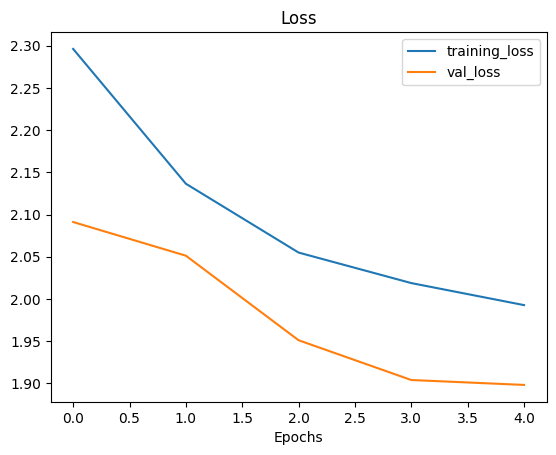

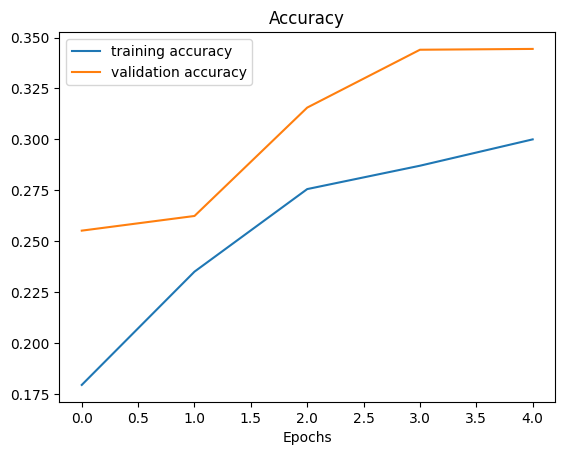

In [38]:
plot_loss_curves(history_11)

The loss curves are much closer to each other. but still didnt perform well.

## 7. Repeat until satisfied


In [39]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

lets download some examples to make our model predict them

In [59]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2023-07-05 18:05:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.3’

03-steak.jpeg.3     100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2023-07-05 18:05:20 (46.4 MB/s) - ‘03-steak.jpeg.3’ saved [1978213/1978213]



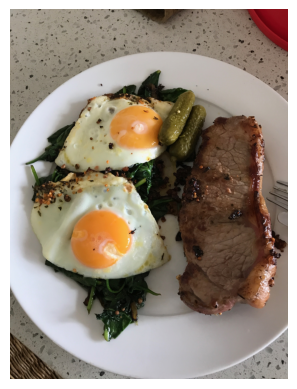

In [54]:


# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);


1/1 [==============================] - 0s 36ms/step


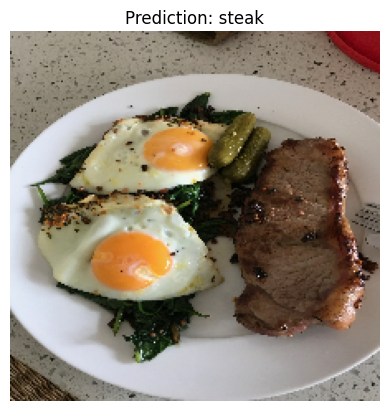

In [55]:
# Lets make a prediction:
# Create a function to import an image and resize it to be able to be used with our model

def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

pred_and_plot(model=model_11,
              filename="03-steak.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 32ms/step


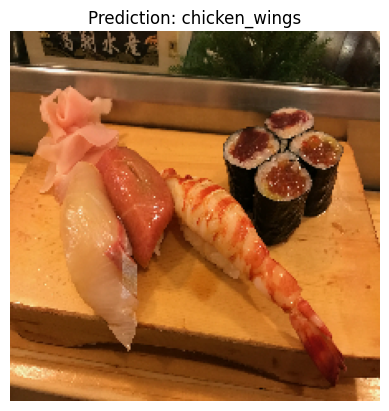

In [56]:


pred_and_plot(model_11, "03-sushi.jpeg", class_names)


Steak is the true prediction but sushi is wrong...

1/1 [==============================] - 0s 18ms/step


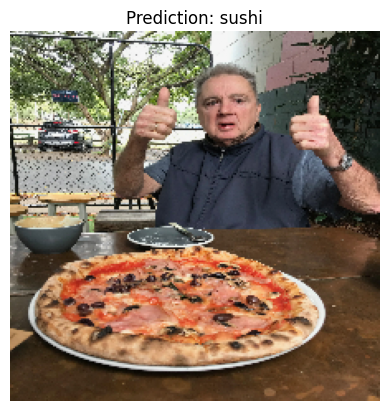

In [57]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

There must be a mistake . Lets mkae a prediction without using the function we have created before which is called 'pred_and_plot'

1/1 [==============================] - 0s 57ms/step


(-0.5, 223.5, 223.5, -0.5)

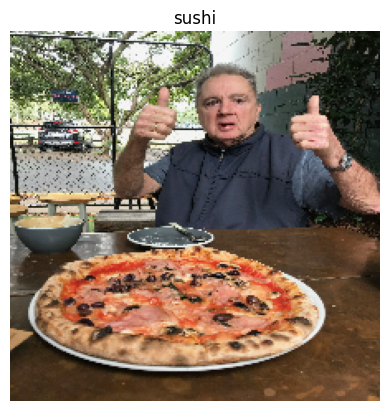

In [61]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
img = load_and_prep_image("03-pizza-dad.jpeg")
# make a prediction
pred = model_11.predict (tf.expand_dims(img, axis=0))
# Match the prediciton class to the highest prediction probabilty
pred_class=class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False)


* The pred_and_plot function was designed to be used with binary classification models where as our current model is a multi-class classification model.

* The main difference lies in the output of the predict function.

In [62]:
# Check the output of the predict function
pred = model_11.predict(tf.expand_dims(img, axis=0))
pred


1/1 [==============================] - 0s 29ms/step


array([[0.02359818, 0.07124376, 0.018015  , 0.05821297, 0.04578026,
        0.0896228 , 0.11516354, 0.13472936, 0.13161245, 0.31202167]],
      dtype=float32)



Since our model has a 'softmax' activation function and 10 output neurons, it outputs a prediction probability for each of the classes in our model.

The class with the highest probability is what the model believes the image contains.

We can find the maximum value index using argmax and then use that to index our class_names list to output the predicted class.


In [63]:


# Find the predicted class name
class_names[pred.argmax()]


'sushi'

Knowing this, we can readjust our pred_and_plot function to work with multiple classes as well as binary classes.

In [64]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

Let's try it out. If we've done it right, using different images should lead to different outputs (rather than chicken_curry every time).

1/1 [==============================] - 0s 60ms/step


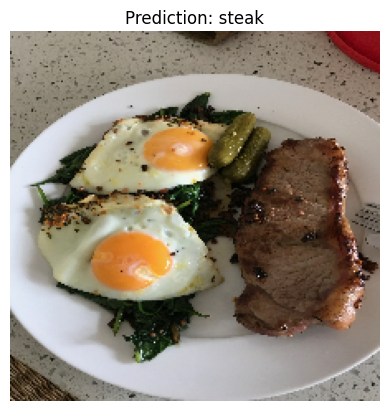

In [65]:
pred_and_plot(model_11, "03-steak.jpeg", class_names)

1/1 [==============================] - 0s 20ms/step


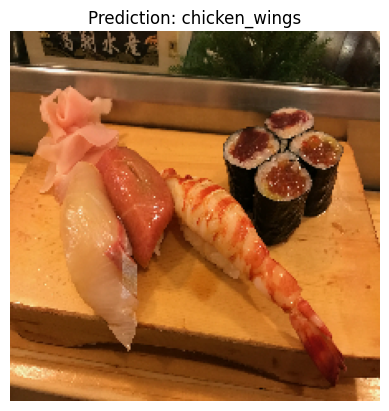

In [66]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 32ms/step


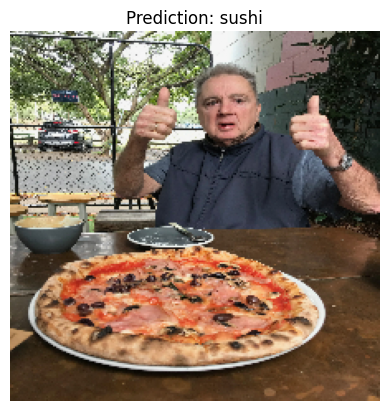

In [67]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 27ms/step


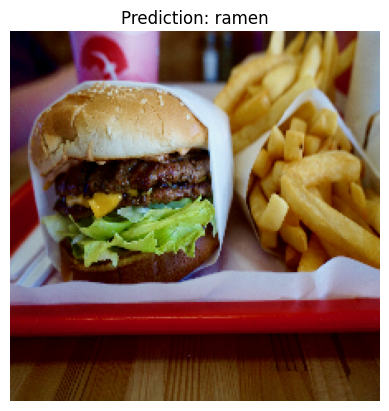

In [68]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)



Our model's predictions aren't very good, this is because it's only performing at ~35% accuracy on the test dataset.

We'll see how to improve this later on (spolier: transfer learning is going to step things up a notch).


## Saving Our model
Once you've trained a model, you probably want to be able to save it and load it somewhere else.

To do so, we can use the save and load_model functions.

In [69]:
# Save a model
model_11.save("saved_trained_model")

In [70]:
# Load in a model and evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 15s 190ms/step - loss: 1.8982 - accuracy: 0.3444


[1.8981600999832153, 0.34439998865127563]

In [71]:
# Compare our unsaved model's results (same as above)
model_11.evaluate(test_data)

79/79 [==============================] - 13s 159ms/step - loss: 1.8982 - accuracy: 0.3444


[1.8981605768203735, 0.34439998865127563]